In [10]:
!pip install -q kaggle

In [11]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"omkarrajale14","key":"84562223c2a32f5520f949d57025170c"}'}

In [19]:
! cp kaggle.json ~/.kaggle/

In [20]:
! chmod 600 ~/.kaggle/kaggle.json

In [21]:
! kaggle datasets list

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                             Apple Quality                                     170KB  2024-01-11 14:31:07          13484        313  1.0              
cdeotte/brain-spectrograms                                 Brain-Spectrograms                                  3GB  2024-01-13 03:25:31           1099        183  0.625            
nelgiriyewithana/emotions                                  Emotions                                           16MB  2024-02-05 16:01:39           1248         64  1.0              
shiivvvaam/bitcoin-historical-data                         Bitcoin Historical Data             

In [22]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 602M/612M [00:06<00:00, 105MB/s]
100% 612M/612M [00:06<00:00, 106MB/s]


In [23]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

# **Import Libraries**

In [46]:
import os
import cv2
import random
import pathlib

import numpy as np
import pandas as pd
import random as rn
import tensorflow as tf
import tensorflow_hub as hub

import plotly.subplots as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from PIL import Image
from tensorflow import keras

from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

from tensorflow.keras.utils import model_to_dot, plot_model
import tensorflow.keras.utils as Utils

from IPython.display import SVG

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## **Loading The Data**

In [24]:
meta_df = pd.read_csv('/content/Meta.csv')
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/Test.csv')

### **Preparing the file paths**

In [25]:
data_path = '/content/'
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
meta_data_path = os.path.join(data_path, 'meta')

#specifies the dimensions for image data
height = 50
width = 50

### Creating 'classes' dictionary with **key**: traffic sign classes and **value**: description of traffic signs

In [26]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons'
          }

In [27]:
batch_size = 150
seed = 42

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_data_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_data_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


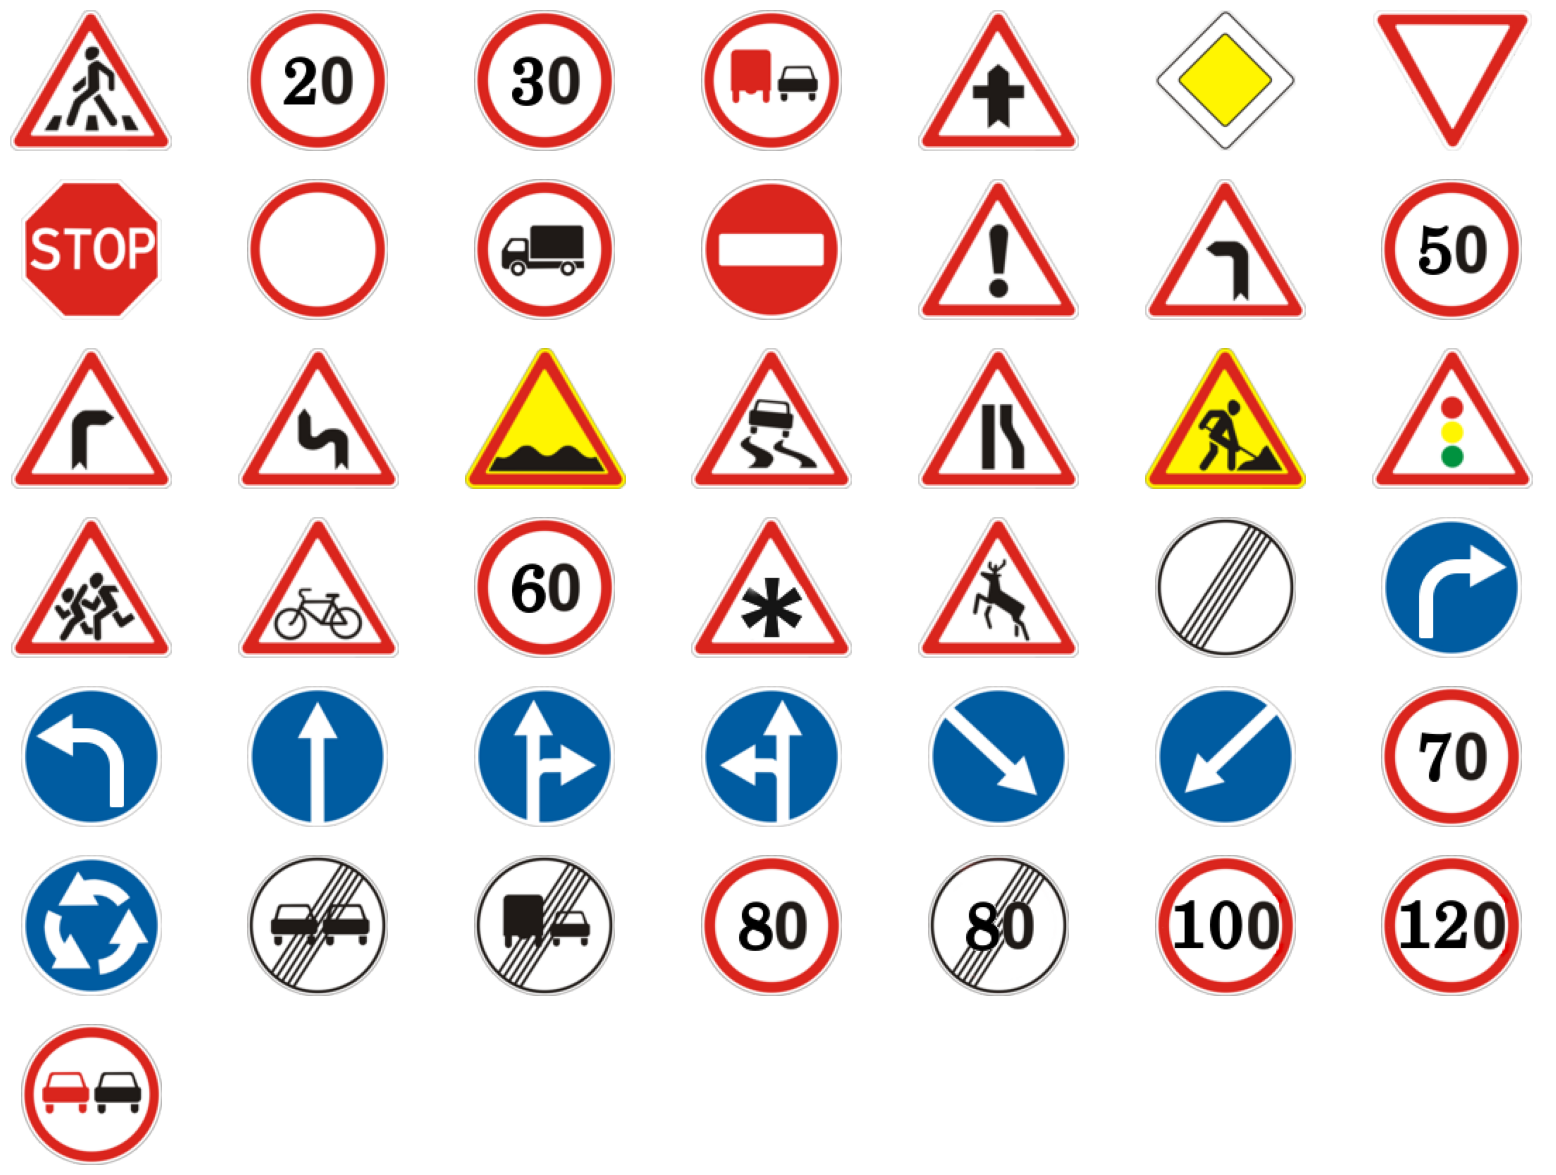

In [29]:
num_pictures = 43
num_rows = (num_pictures - 1) // 7 + 1
num_cols = min(num_pictures, 7)

signs = [os.path.join(data_path, meta_df.Path.to_list()[i]) for i in range(num_pictures)]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, image_path in enumerate(signs):
    image = Image.open(image_path)
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

# Remove any remaining empty subplots
for i in range(num_pictures, num_rows * num_cols):
    axes.flat[i].axis('off')

plt.show()

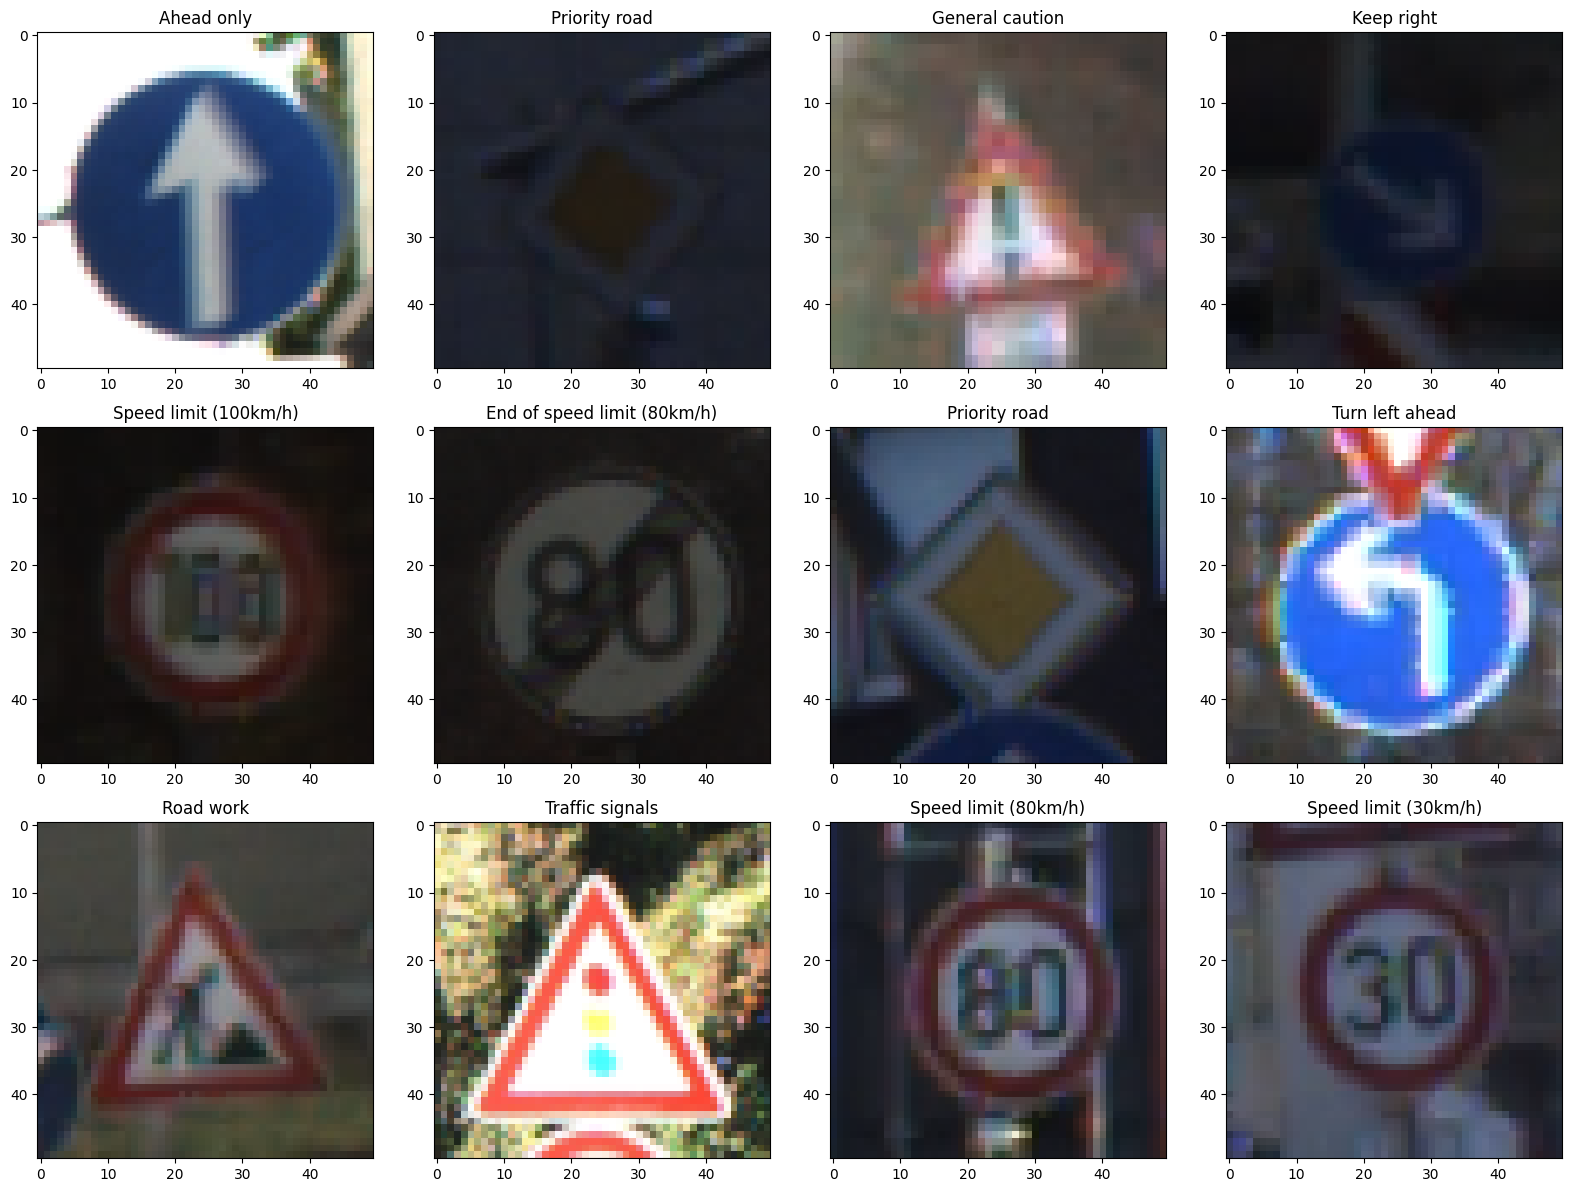

In [30]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [32]:
# Assuming you have the train_df DataFrame with the data
classes = train_df["ClassId"].value_counts().head(43)

# Create a Plotly bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=classes.index,
    y=classes.values,
    marker_color='green'
))

fig.update_layout(
    title="Distribution of Class Labels in the dataset",
    xaxis_title="Classes",
    yaxis_title="Counts",
    xaxis=dict(type='category')
)

fig.show()

In [33]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),

    keras.layers.Dense(43, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        12832     
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 21, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 21, 21, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        3

In [35]:
alpha=0.01
epochs=25
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

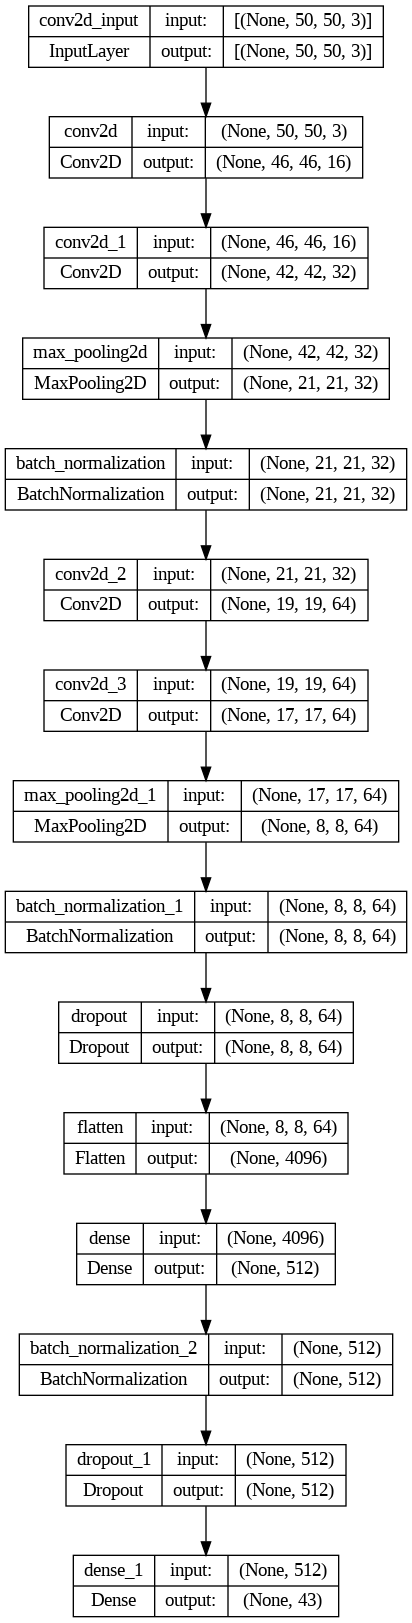

In [47]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

Epoch 1/25
210/210 [==============================] - 40s 139ms/step - loss: 0.8348 - accuracy: 0.7919 - val_loss: 0.5301 - val_accuracy: 0.8638
Epoch 2/25
210/210 [==============================] - 27s 131ms/step - loss: 0.0701 - accuracy: 0.9796 - val_loss: 0.3877 - val_accuracy: 0.9110
Epoch 3/25
210/210 [==============================] - 22s 106ms/step - loss: 0.0390 - accuracy: 0.9873 - val_loss: 0.5625 - val_accuracy: 0.8847
Epoch 4/25
210/210 [==============================] - 24s 115ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.6252 - val_accuracy: 0.8630
Epoch 5/25
210/210 [==============================] - 22s 104ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.2811 - val_accuracy: 0.9459
Epoch 6/25
210/210 [==============================] - 25s 117ms/step - loss: 0.0299 - accuracy: 0.9911 - val_loss: 0.2818 - val_accuracy: 0.9489
Epoch 7/25
210/210 [==============================] - 22s 106ms/step - loss: 0.0319 - accuracy: 0.9907 - val_loss: 0.4798 - val_ac